## Regressão Linear

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

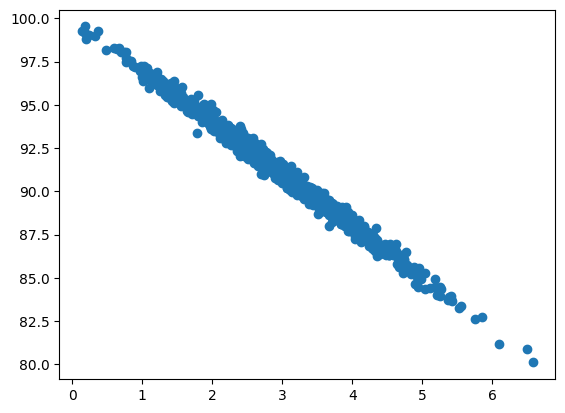

In [ ]:
pageSpeeds =  np.random.normal(3, 1, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [ ]:
r_value ** 2

0.9900995069811004

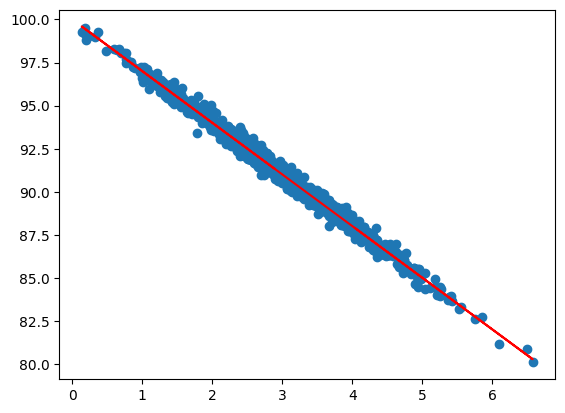

In [ ]:
def predict(x):
    return slope * x + intercept

fitline = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitline, c='r')
plt.show()

## Regressão Polinomial

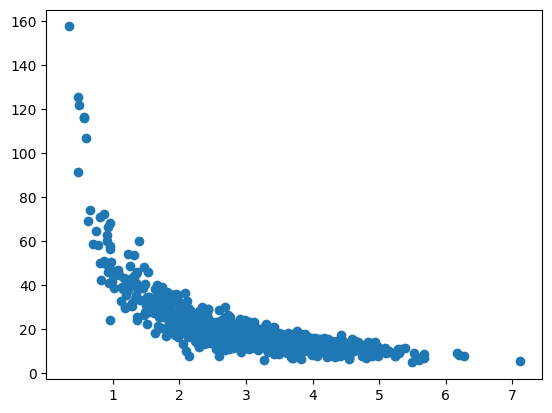

In [ ]:
np.random.seed(2)
pageSpeeds =  np.random.normal(3, 1, 1000)
purchaseAmount = np.random.normal(50, 10, 1000)
purchaseAmount = purchaseAmount / pageSpeeds

plt.scatter(x=pageSpeeds, y=purchaseAmount)

x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

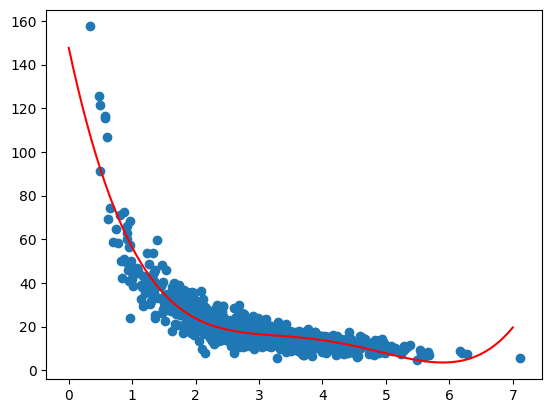

In [ ]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, p4(x))

0.8293766396303073

Regressão Múltipla

In [ ]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


<ipython-input-37-1d27a99d6631>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


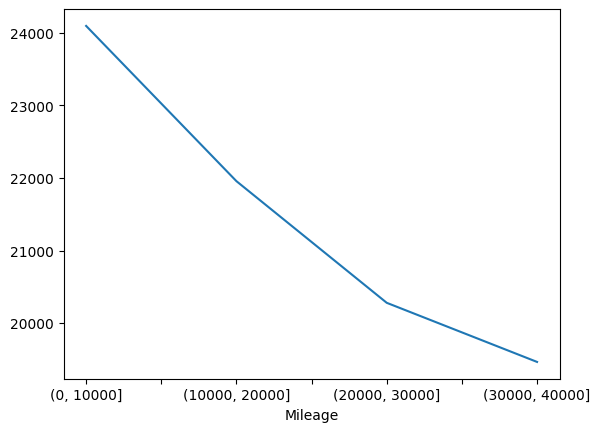

In [ ]:
df1 = df[['Mileage', 'Price']]

bins = np.arange(0, 50000, 10000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups.head())
groups['Price'].plot.line()
plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

print(X)

est = sm.OLS(y, X).fit()

est.summary()


      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]


<ipython-input-41-68c081d50298>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                    2.23e-11
Time:                        13:47:31   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y.groupby(df.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749


In [ ]:
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)


[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]


## Train / Test

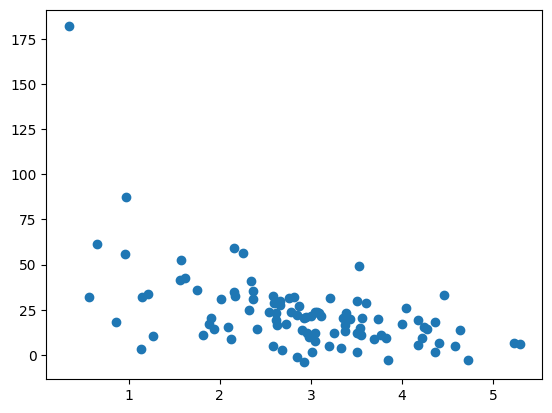

In [ ]:
np.random.seed(2)

pageSpeeds =  np.random.normal(3, 1, 100)
purchaseAmount = np.random.normal(50, 30, 100) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)
plt.show()


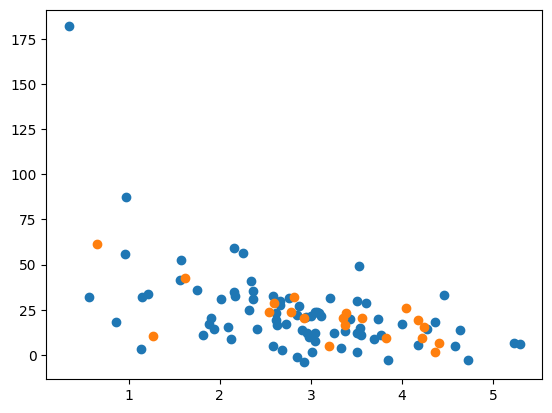

In [ ]:
trainX = pageSpeeds[:80]
trainY = purchaseAmount[:80]

testX = pageSpeeds[80:]
testY = purchaseAmount[80:]

plt.scatter(trainX, trainY)
plt.scatter(testX, testY)

In [ ]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 4))

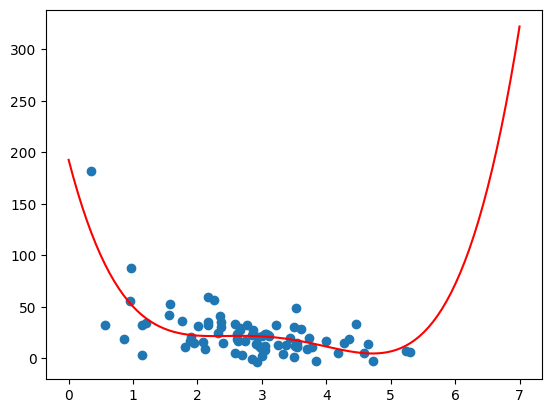

In [ ]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

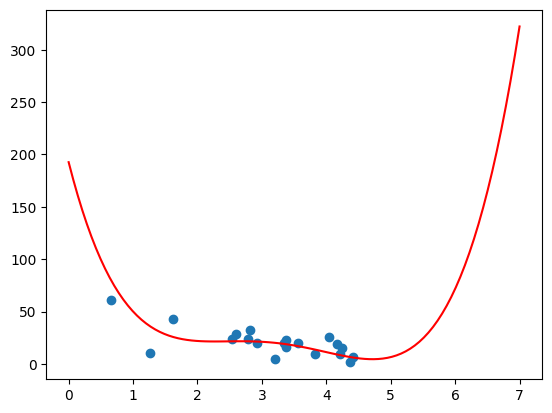

In [ ]:
testx = np.array(testX)
testy = np.array(testY)

plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()


In [ ]:
r2_score(testy, p4(testx))


0.39362692609903305

In [ ]:
r2_score(np.array(trainY), p4(np.array(trainX)))


0.4831221655972038

Grau do polinômio: 0


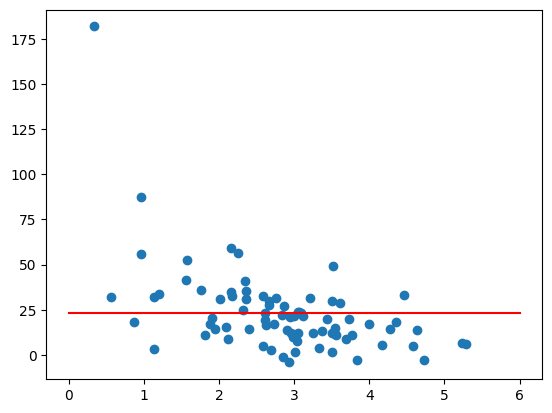

R2: 0.0
Grau do polinômio: 1


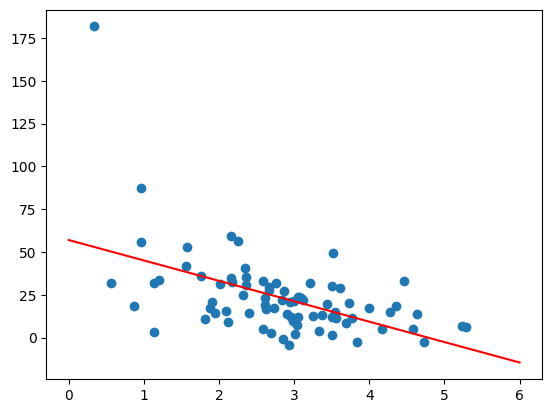

R2: 0.2646676132565092
Grau do polinômio: 2


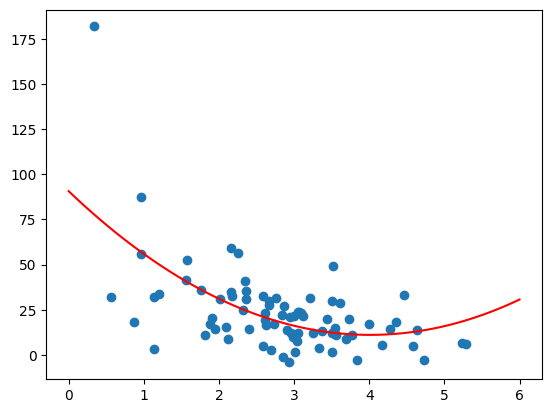

R2: 0.36158094628302184
Grau do polinômio: 3


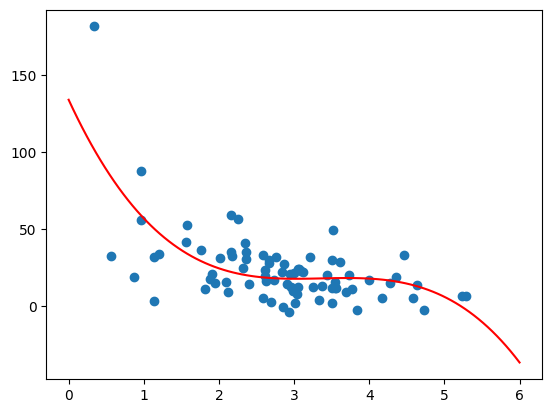

R2: 0.4295783201206692
Grau do polinômio: 4


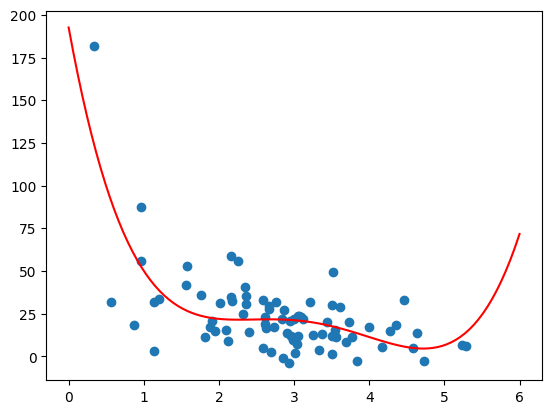

R2: 0.4831221655972038
Grau do polinômio: 5


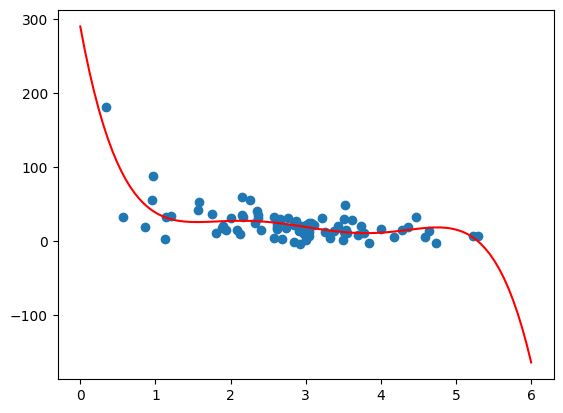

R2: 0.5544872536567714
Grau do polinômio: 6


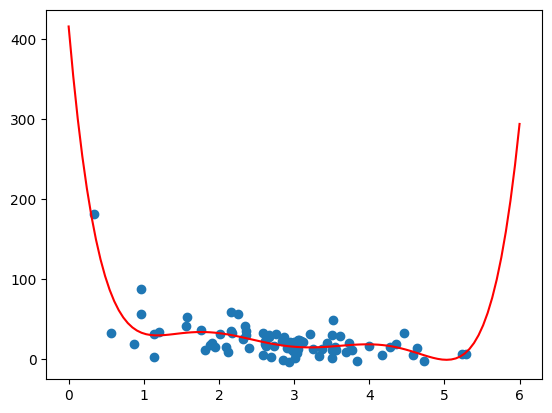

R2: 0.6025441707110514
Grau do polinômio: 7


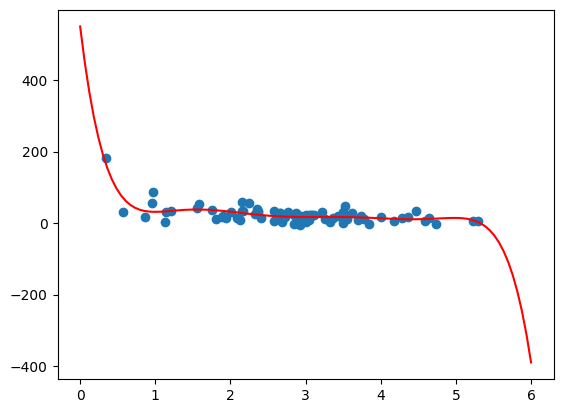

R2: 0.6170116571732045


0.6170116571732045

In [131]:
x = np.array(trainX)
y = np.array(trainY)

r2=[]

for i in range(8):
    print(f'Grau do polinômio: {i}')
    p4 = np.poly1d(np.polyfit(x, y, i))

    xp = np.linspace(0, 6, 100)
    plt.scatter(x, y)
    plt.plot(xp, p4(xp), c='r')
    plt.show()
    r2.append(r2_score(np.array(trainY), p4(np.array(trainX))))
    print(f'R2: {r2_score(np.array(trainY), p4(np.array(trainX)))}')


r2_score(np.array(trainY), p4(np.array(trainX)))



## Naive Bayes

In [68]:
import os
import io
from pandas import DataFrame
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines=[]
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data._append(dataFrameFromDirectory('emails/spam', 'spam'))
data = data._append(dataFrameFromDirectory('emails/ham', 'ham'))

In [75]:
data.head(-10)

,message,class
emails/spam/00294.df27a988d82cc82296e33e6d727ac47e,Get your favorite Poker action at http://www.m...,spam
emails/spam/00109.eda1664dd3b3c31b67e5cd04553b6546,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
emails/spam/00073.8dcd40346d48c69a9e075e935395e96d,Dear Sir / Madam\n\n\n\nIf you are fed up of b...,spam
emails/spam/00285.8a06c91fcdf4a1ae8ca928f3ef3feecb,"<html>\n\n\n\n<head>\n\n<meta http-equiv=3D""Co...",spam
emails/spam/00281.db28f3aab77ff478279d8de20d572b42,\n\n<html><body><center>\n\n\n\n<table bgcolor...,spam
...,...,...
emails/ham/00047.39812fcb014cf9c22a2ff4fec61f3c19,It will function as a router if that is what y...,ham
emails/ham/00257.3e5b4e24045e108fedeff7d6ff8eecc5,"On Tue, Oct 08, 2002 at 11:51:54AM -0700, Elia...",ham
emails/ham/00231.b295668c907d5f4d50f8e9db78ae5714,"Hi,\n\n\n\nsome time now the following message...",ham
emails/ham/00064.cb4bd5482454f02b6c3d70343af090a8,\n\n _ _ _____ _ __ <*the* weekly high-tech...,ham


In [70]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB()

In [79]:
examples = ['Get your favorite Poker action at http://www.m']
examples_counts = vectorizer.transform(examples)
predictions = classifier.predict(examples_counts)
predictions

array(['spam'], dtype='<U4')

In [78]:
examples = ['It will function as a router if that is what y..']
examples_counts = vectorizer.transform(examples)
predictions = classifier.predict(examples_counts)
predictions

array(['ham'], dtype='<U4')

## K-Means Clustering Example

In [82]:
def createClusteredData(N,K):
    np.random.seed(10)
    pointsperCluster = float(N)/K
    X=[]
    for cluster in range(K):
        incomeCentroid = np.random.uniform(20000.0,200000.0)
        ageCentroid = np.random.uniform(20.0,70.0)
        for j in range(int(pointsperCluster)):
            X.append([np.random.normal(incomeCentroid,10000.0),np.random.normal(ageCentroid,2.0)])
    X = np.array(X)
    return X

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

#create fake income/age clusters for N people in k clusters

data = createClusteredData(100,5)
model = KMeans(n_clusters = 5)
model = model.fit(scale(data))
print(model.labels_)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0 0 4 4 4]


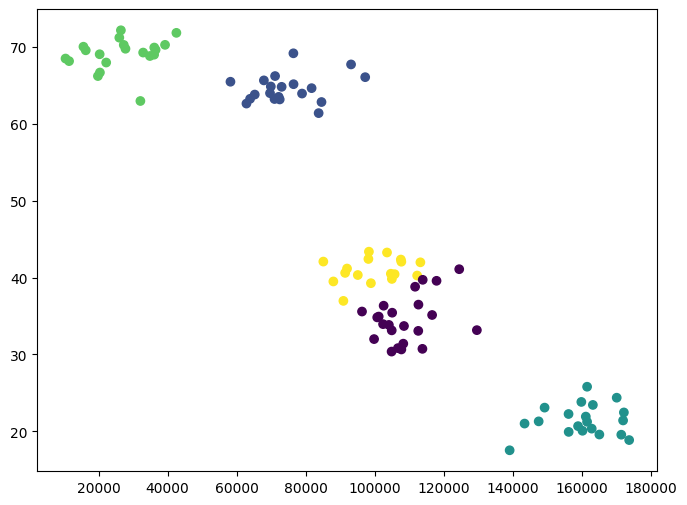

In [85]:
#visualize
plt.figure(figsize = (8,6))
plt.scatter(data[:,0],data[:,1],c=model.labels_.astype(float))
plt.show()

## Decision Trees

In [88]:
import pandas as pd
from sklearn import tree
from IPython.display import Image

df = pd.read_csv('/content/PastHires.csv',header=0)
display(df.head())

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [89]:
d ={'Y':1,'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

d={'BS':0,'MS':1,'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)

In [91]:
display(df.head())

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [92]:
features = list(df.columns[:6])
display(features)

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [93]:
x=df[features]
y=df['Hired']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

In [94]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)

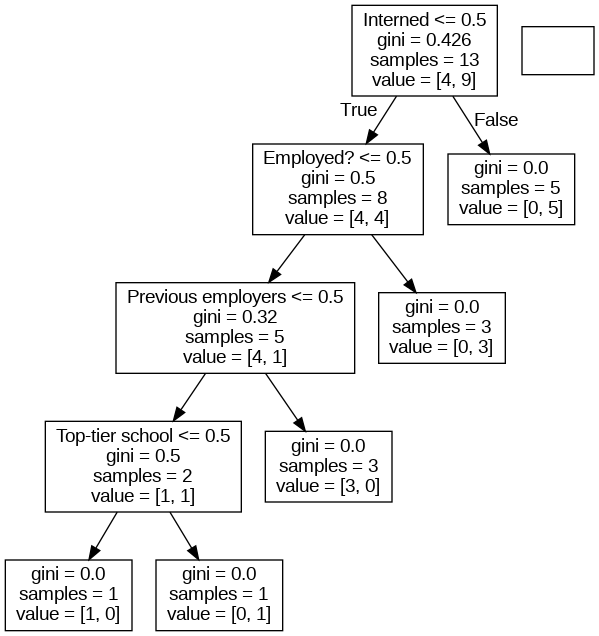

In [95]:
Image(graph.create_png())

In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x,y)

print(clf.predict([[10,1,4,0,0,0]]))


[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## XGBoost

In [100]:
!sudo pip install xgboost
!sudo pip install --upgrade xgboost

In [101]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [105]:
param = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.3,  # training step
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [110]:
model = xgb.train(param, dtrain, num_round) #train model

In [113]:
predictions = model.predict(dtest)
print(predictions)

[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


In [114]:
param = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.3,  # training step
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

model2 = xgb.train(param, dtrain, num_round) #train model

predictions = model2.predict(dtest)
print(predictions)

[[0.00455297 0.9856699  0.00977705]
 [0.984648   0.01138419 0.00396782]
 [0.0039027  0.00801371 0.98808354]
 [0.00454297 0.98350465 0.01195241]
 [0.00440232 0.9530568  0.0425409 ]
 [0.9890049  0.00743534 0.00355981]
 [0.00386248 0.9913201  0.0048175 ]
 [0.0126443  0.04712953 0.9402262 ]
 [0.0049239  0.95180106 0.04327502]
 [0.00386248 0.9913201  0.0048175 ]
 [0.0129052  0.04912744 0.93796736]
 [0.9900968  0.00560875 0.00429446]
 [0.98626477 0.01018528 0.00354995]
 [0.9908208  0.00561285 0.00356635]
 [0.9908208  0.00561285 0.00356635]
 [0.00394612 0.98715055 0.00890331]
 [0.00323613 0.00510353 0.9916604 ]
 [0.00385273 0.9888182  0.00732897]
 [0.0038491  0.98788536 0.00826555]
 [0.00323613 0.00510353 0.9916604 ]
 [0.9908208  0.00561285 0.00356635]
 [0.00769053 0.10165843 0.8906511 ]
 [0.9908208  0.00561285 0.00356635]
 [0.00323613 0.00510353 0.9916604 ]
 [0.00488811 0.00890842 0.98620343]
 [0.00359922 0.00642254 0.9899782 ]
 [0.0039027  0.00801371 0.98808354]
 [0.00488811 0.00890842 0.98

Support Vector Machines

In [115]:
import numpy as np

def createClusteredData(N,K):
    np.random.seed(10)
    pointsperCluster = float(N)/K
    X=[]
    y=[]
    for i in range(K):
        incomeCentroid = np.random.uniform(20000.0,200000.0)
        ageCentroid = np.random.uniform(20.0,70.0)
        for j in range(int(pointsperCluster)):
            X.append([np.random.normal(incomeCentroid,10000.0),np.random.normal(ageCentroid,2.0)])
            y.append(i)
    X = np.array(X)
    y=np.array(y)
    return X,y

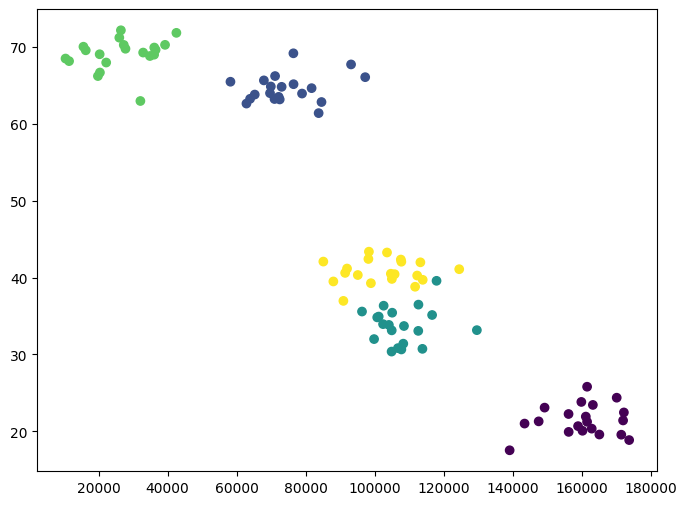

In [116]:
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X,y) = createClusteredData(100,5)

plt.figure(figsize = (8,6))
plt.scatter(X[:,0],X[:,1],c=y.astype(float))
plt.show()

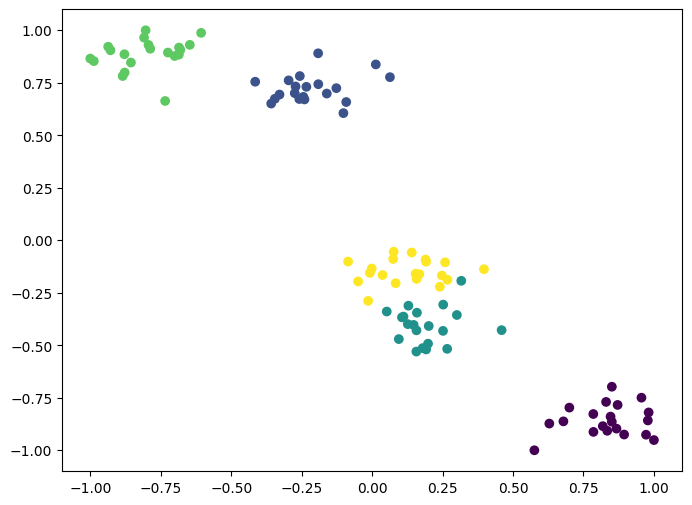

In [125]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize = (8,6))
plt.scatter(X[:,0],X[:,1],c=y.astype(float))
plt.show()

In [126]:
from sklearn import svm,datasets

svc = svm.SVC(kernel='linear',C=1).fit(X,y)

In [128]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(-1, 1, .01),
                     np.arange(-1, 1, .01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(float))
    plt.show()

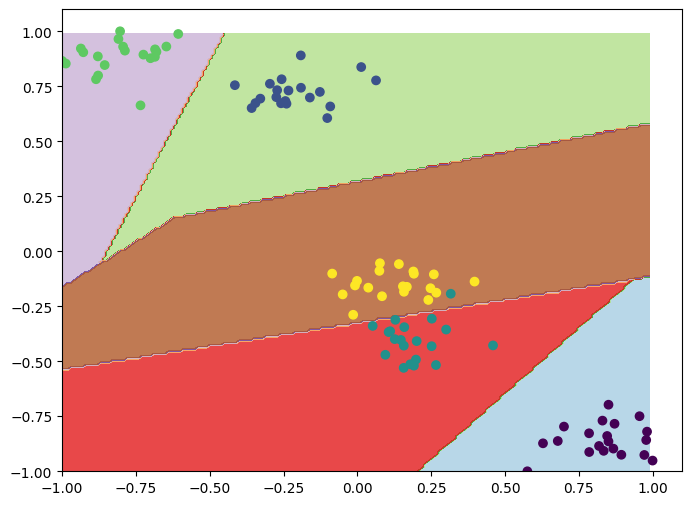

In [129]:
plotPredictions(svc)

In [130]:
print(svc.predict(scaling.transform([[50000,65]])))

[0]
